<a href="https://www.kaggle.com/code/shehabemad2/why-are-we-losing-them-in-depth-eda?scriptVersionId=105690896" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This dataset is created by collected from the GSHS- Global School-based Student Health Survey of adolescents based on Gender from 26 countries. It has selected questions and provides percentage of each gender with age for each factor, there are 10 core modules which have several sub-modules.

## Importing Libraries and Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
!pip install country_converter

import country_converter
from plotly.subplots import make_subplots
import plotly.graph_objects as go

WIDTH = 850

pd.set_option('display.max_rows', None)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warnings.filterwarnings('ignore')        

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 kB 608.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for country_converter: filename=country_converter-0.7.7-py3-none-any.whl size=53786 sha256=bc728b20c128e00a8aab4bec2876aa4b2fcf40f5886cab695028bd5d0811449d
  Stored in directory: /root/.cache/pip/wheels/e8/e6/60/61798a8a91462250002293d1c8cc8de90a130119a813277ccc
Successfully built country_converter
/kaggle/input/suicidal-behaviours-among-adolescents/Originally collectedGHSH_Pooled_Data.csv
/kaggle/input/suicidal-behaviours-among-adolescents/GHSH_Pooled_Data1.csv


In [2]:
path = '../input/suicidal-behaviours-among-adolescents/GHSH_Pooled_Data1.csv'
df = pd.read_csv(path)


## Data Investegation:

In [3]:
df.head()

,Country,Year,Age Group,Sex,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
0,Argentina,2018,13-15,Female,50.3,30.7,27.8,7.9,41.5,24.7,25.7,16.8,17.2,NaN,27.5,4.8,19.9
1,Argentina,2018,13-15,Male,44.9,26.1,39.1,8.4,44.5,27.9,38.4,12.1,33.2,NaN,37.4,5.5,10.4
2,Argentina,2018,16-17,Female,67.2,56.3,22.5,21.9,37.1,34.0,59.1,28.5,15.1,NaN,30.1,6.3,17.4
3,Argentina,2018,16-17,Male,68.1,55.8,27.9,27.0,39.8,39.4,68.6,28.0,33.6,NaN,40.3,6.6,11.2
4,Argentina,2012,13-15,Male,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.1,24.8,6.1,12.9


In [4]:
df.info()
# we have only few null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           106 non-null    object 
 1   Year                              106 non-null    int64  
 2   Age Group                         106 non-null    object 
 3   Sex                               106 non-null    object 
 4   Currently_Drink_Alcohol           106 non-null    float64
 5   Really_Get_Drunk                  106 non-null    float64
 6   Overwieght                        106 non-null    float64
 7   Use_Marijuana                     106 non-null    float64
 8   Have_Understanding_Parents        106 non-null    float64
 9   Missed_classes_without_permssion  106 non-null    float64
 10  Had_sexual_relation               106 non-null    float64
 11  Smoke_cig_currently               104 non-null    float64
 12  Had_figh

In [5]:
def unique_values(cols):
    for col in cols :
        print ("\n Unique values of " + col + " are :" )
        print (df[col].unique())
        print ("unique values count are:" + str(len(df[col].unique())))

In [6]:
unique_values(df[['Country','Year','Age Group','Sex']])


 Unique values of Country are :
['Argentina' 'Barabados' 'Benin' 'Bhutan' 'Brunei Darussalam '
 'Dominican Republic ' 'Fiji Islands' 'Indonesia' 'Jamaica' 'Kiribati'
 'Laos' 'Malaysia' 'Mauritus' 'Mongolia' 'Namibia' 'Nepal' 'Peru' 'Samoa'
 'Seychelles' 'Suriname' 'Thailand' 'Timor-Leste ' 'Trinidad and Tobago '
 'Tuvalu ' 'Uruguay ' 'Vanuatu ' 'Wallis and Futuna ']
unique values count are:27

 Unique values of Year are :
[2018 2012 2011 2016 2014 2015 2017 2013 2010]
unique values count are:9

 Unique values of Age Group are :
['13-15' '16-17']
unique values count are:2

 Unique values of Sex are :
['Female' 'Male']
unique values count are:2


### -we have 27 diffrent countries 
### -years range from 2010 to 2018
### -only two age categories 

In [7]:
df_mean = df.groupby('Country')[['Attempted_suicide']].mean().sort_values('Attempted_suicide',ascending = False)
fig_bar = px.bar(x = df_mean.index, y = df_mean.Attempted_suicide, color = df_mean.Attempted_suicide, color_continuous_scale='dense')
fig_bar.update_layout(width = WIDTH, height = 500, title_text="suicide rates by Country")
fig_bar.update_xaxes(title = 'Country')
fig_bar.update_yaxes(title = 'Suicide rate')
fig_bar.show()

In [8]:
df.groupby('Sex')[['Attempted_suicide']].mean()


,Attempted_suicide
Sex,
Female,15.122642
Male,13.783019


In [9]:
df['Country_iso3'] = country_converter.convert(names=df['Country'], to="ISO3")

In [10]:
fig = px.choropleth(df.sort_values('Year'),locations='Country_iso3',
                    color='Attempted_suicide',
                    color_continuous_scale='dense',
                    title = 'Attempted_suicide per Country and Year', 
                    animation_frame='Year',
                    
                   )
fig.update_layout(width = WIDTH, height = 600, title_text="Attempted_suicide per Country and Year")
fig.show()


In [11]:
df_mean = df.groupby('Country_iso3')[['Attempted_suicide']].mean().sort_values('Attempted_suicide',ascending = False)
fig = px.choropleth(locations=df_mean.index,
                    color=df_mean['Attempted_suicide'],
                    color_continuous_scale='dense',
                    title = 'Mean suicide rate per Country')


fig.update_layout(width = WIDTH, height = 600, title_text="Mean suicide rate per Country")
fig.show()


In [12]:
fig = px.histogram(df, x = 'Attempted_suicide', color = 'Sex', marginal="box", opacity = 0.8,
                   color_discrete_sequence = ['black', 'gray', 'blue'])

fig.update_layout(width = WIDTH, title_text="Distribution of Salaries per Year")
fig.show()

#### for the other features we might need to represent them with bins rather than numeric numbers:


In [13]:
df.loc[32,'Currently_Drink_Alcohol'] = 54.8
## we ha an oultlier here with Currently_Drink_Alcohol set as 548% , will assume it was 54.8

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           106 non-null    object 
 1   Year                              106 non-null    int64  
 2   Age Group                         106 non-null    object 
 3   Sex                               106 non-null    object 
 4   Currently_Drink_Alcohol           106 non-null    float64
 5   Really_Get_Drunk                  106 non-null    float64
 6   Overwieght                        106 non-null    float64
 7   Use_Marijuana                     106 non-null    float64
 8   Have_Understanding_Parents        106 non-null    float64
 9   Missed_classes_without_permssion  106 non-null    float64
 10  Had_sexual_relation               106 non-null    float64
 11  Smoke_cig_currently               104 non-null    float64
 12  Had_figh

## now lets ask and answer some questions about our data:

### Q1 : are those who are overweight gets bullied more often ?

In [15]:
df.groupby(['Overwieght','Bullied'])[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending = False).head()



,,Attempted_suicide
Overwieght,Bullied,
43.4,78.6,67.2
59.1,69.4,53.7
46.4,32.2,31.5
12.8,60.0,30.3
6.3,47.9,29.9


In [16]:
df.groupby(['Overwieght','Bullied'])[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending = False).tail()

,,Attempted_suicide
Overwieght,Bullied,
10.3,9.9,3.8
12.6,24.0,3.7
52.2,15.0,3.6
14.9,19.0,3.6
13.1,13.0,2.7


### we might say that those who are overwieght and gets bullied are more likley to attempt suicide
### however we can also notice that those who are overwieght but didn't got bullied aren't high in suicide attempt which suggest that
### it's all about how the society deal with it specially in young ages 

#### our second question would be :
##### Q2: do those who Use Marijuana have understanding parents ?

In [17]:
df.groupby(['Use_Marijuana','Have_Understanding_Parents'])[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending = False).head()

,,Attempted_suicide
Use_Marijuana,Have_Understanding_Parents,
43.2,30.0,67.2
24.7,36.7,53.7
1.6,15.4,31.5
5.3,13.9,30.3
6.7,40.2,29.9


In [18]:
df.groupby(['Use_Marijuana','Have_Understanding_Parents'])[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending = False).tail()

,,Attempted_suicide
Use_Marijuana,Have_Understanding_Parents,
1.2,15.5,3.8
2.9,30.2,3.7
0.7,36.2,3.6
0.0,19.6,3.6
0.2,38.8,2.7


### surprisingly having understanding parents isn't really enough either to not use Marijuana nor to attempt suicide 

#### now for our finalu question :
#### Q3:  is having No close friends while getting Bullied a reason?

In [19]:
df.groupby(['No_close_friends','Bullied'])[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending = False).head()

,,Attempted_suicide
No_close_friends,Bullied,
17.4,78.6,67.2
14.9,69.4,53.7
2.1,32.2,31.5
7.9,60.0,30.3
13.0,47.9,29.9


In [20]:
df.groupby(['No_close_friends','Bullied'])[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending = False).tail()

,,Attempted_suicide
No_close_friends,Bullied,
5.5,9.9,3.8
4.0,24.0,3.7
14.9,15.0,3.6
2.4,19.0,3.6
1.6,13.0,2.7


### unsurprisingly, indead having no close friends while gettiong bullied is a nightmare for those kids

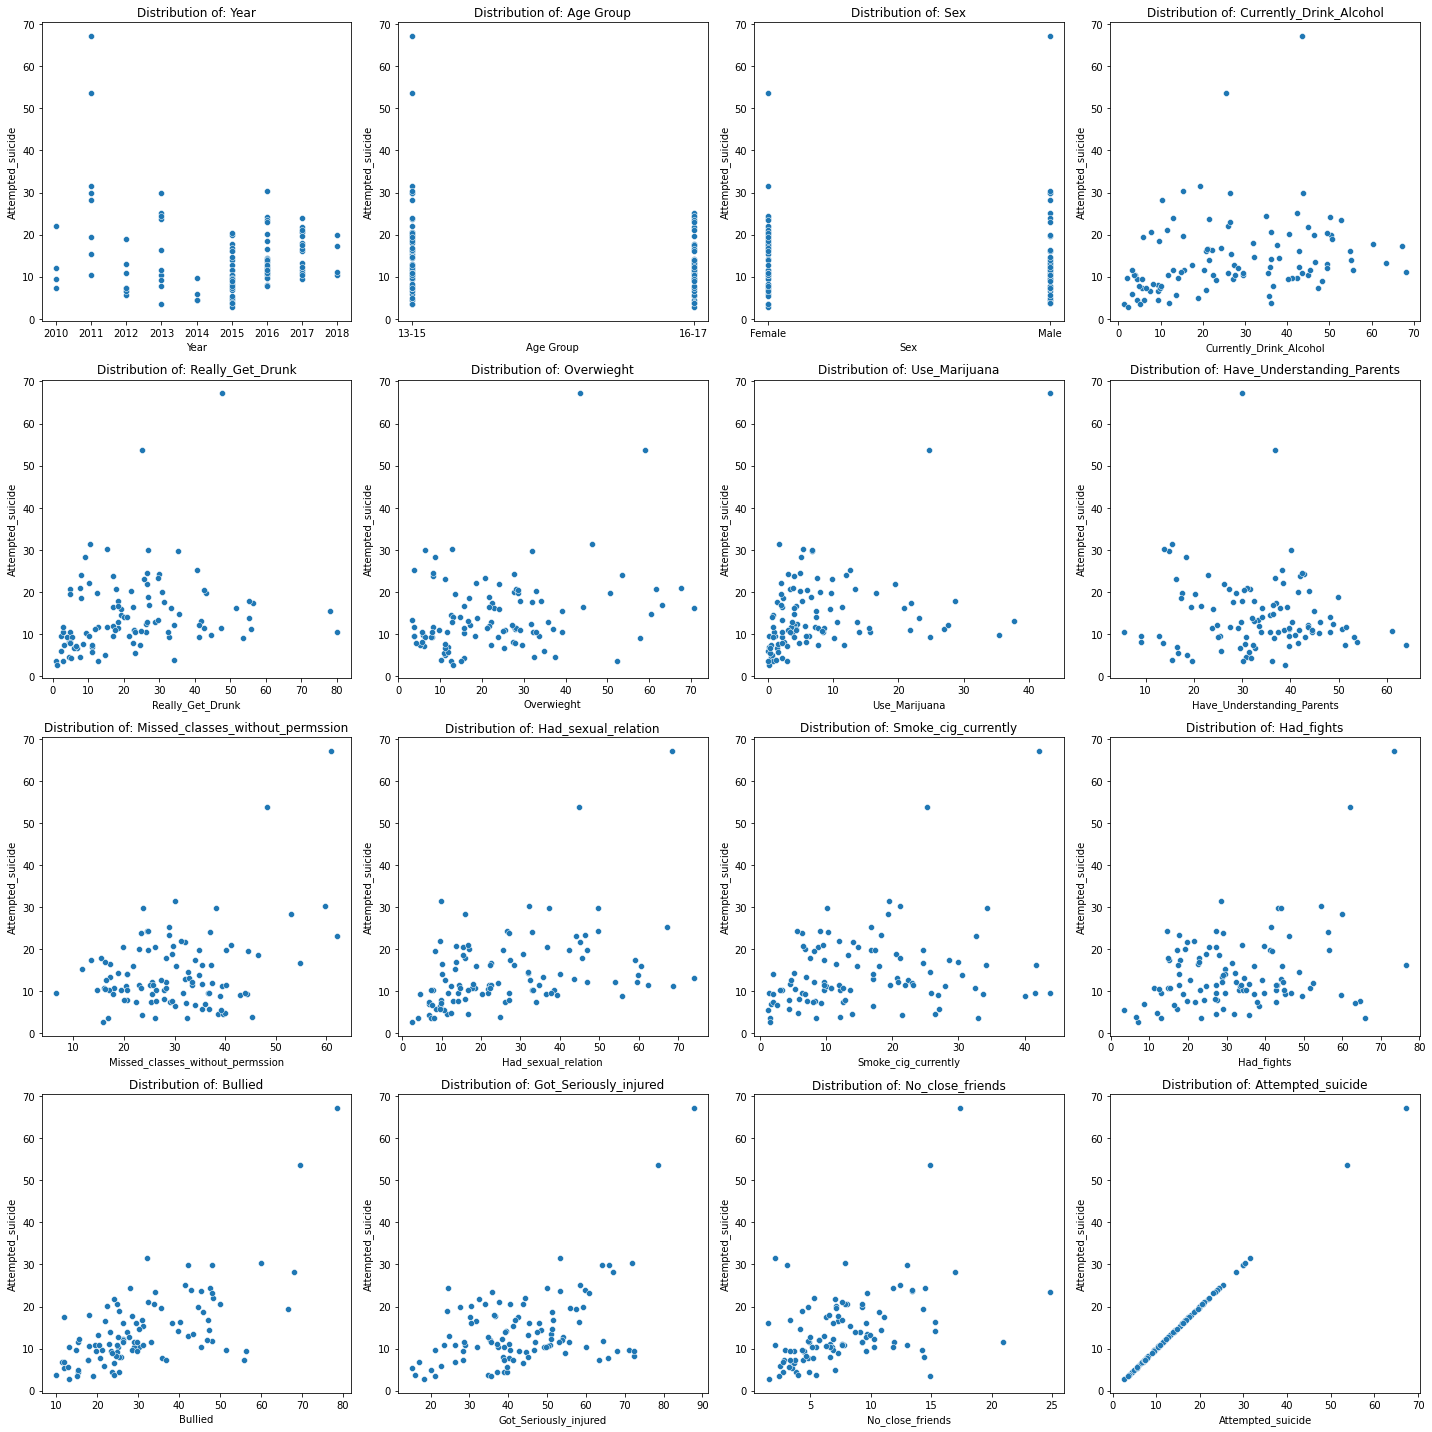

In [21]:
cols = ['Year','Age Group','Sex','Currently_Drink_Alcohol','Really_Get_Drunk','Overwieght','Use_Marijuana','Have_Understanding_Parents',
       'Missed_classes_without_permssion','Had_sexual_relation','Smoke_cig_currently','Had_fights','Bullied','Got_Seriously_injured','No_close_friends',
       'Attempted_suicide']

x_ax = range(len(df))
plt.figure(figsize=(20,20))
for i,v in enumerate(cols,1):
    plt.subplot(4,4,i)
    plt.title(f"Distribution of: " + v   )
    sns.scatterplot(x = df[v], y=df['Attempted_suicide'] )
    plt.tight_layout()
    plt.plot()

from the previous graphs we can clearly see that those with No close friends, those who gets bullied, those who got seriously injured, and many other clear bad habits are more than enough for kids and teenagers to attempt suicide.

### Finally i must mention that many of these habits such as using Marijuana, Getting really drunk..etc, might not be the reason to suicide but actually the way out for many of theose teenagers.
### I hope that we can use this data and EDA to better understand and help those who need to be rescued to show them a better life, a life they might want to live.
### it starts with us but it goes down to parents and socity to prevent us from losing them.